In [1]:
using Pkg
using BenchmarkTools
using Plots
using Statistics

In [2]:
vector = rand(10^7)
sorted_vector = sort(vector)
best_times = Dict()

Dict{Any, Any}()

In [3]:
# Function to generate a random key
function generate_random_key()
    return rand()
end

generate_random_key (generic function with 1 method)

In [4]:
# Sequential search function
function sequential_search(vector, key)
    for i in 1:length(vector)
        if vector[i] == key
            return i  # Returns the index where the key was found
        end
    end
    return -1  # Returns -1 if the key is not found
end

sequential_search (generic function with 1 method)

In [5]:
# Optimized sequential search function
function optimized_sequential_search(sorted_vector, key)
    for i in 1:length(sorted_vector)
        if key == sorted_vector[i]
            return i  # Returns the index where the key was found
        elseif key < sorted_vector[i]
            return -1  # Returns -1 if the key is not found
        end
    end
    return -1  # Returns -1 if the key is not found
end

optimized_sequential_search (generic function with 1 method)

In [6]:
# Binary search function
function binary_search(sorted_vector, key)
    low = 1
    high = length(sorted_vector)
    
    while low <= high
        mid = (low + high) ÷ 2
        if sorted_vector[mid] == key
            return mid  # Returns the index where the key was found
        elseif sorted_vector[mid] < key
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return -1  # Returns -1 if the key is not found
end

binary_search (generic function with 1 method)

In [7]:
sequential_bench = @benchmark sequential_search($vector, generate_random_key())

BenchmarkTools.Trial: 444 samples with 1 evaluation.
 Range (min … max):  10.380 ms …  13.800 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     10.862 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   10.911 ms ± 324.329 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

                 ▁▆▅▅█ ▆▆▁▂▄                                    
  ▄▂▂▁▃▁▄▃▄▄▅▅▄██████████████▆▄▄▄▃▂▅▃▃▄▃▂▄▃▃▁▄▁▁▂▂▁▁▂▁▁▁▁▁▂▂▂▂ ▄
  10.4 ms         Histogram: frequency by time         11.8 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [8]:
best_times["sequential"] = minimum(sequential_bench.times) / 1e6

10.379693

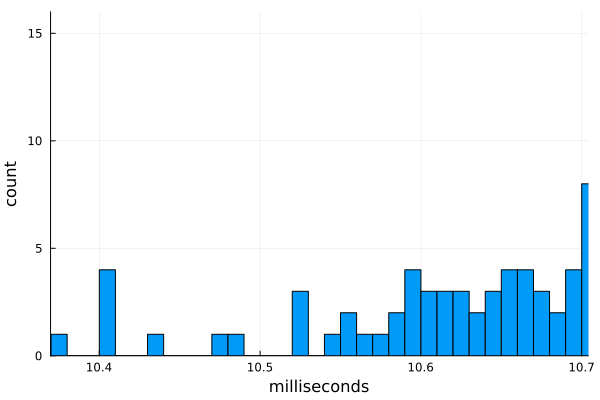

In [9]:
gr()
t1 = sequential_bench.times / 1e6 # times in milliseconds
m, o = minimum(t1), std(t1)

histogram(t1, bins=500,
    xlim=(m - 0.01, m + o),
    xlabel="milliseconds", ylabel="count", label="")

In [10]:
optimized_bench = @benchmark optimized_sequential_search($sorted_vector, generate_random_key())

BenchmarkTools.Trial: 1128 samples with 1 evaluation.
 Range (min … max):  5.891 μs … 14.425 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     4.296 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.427 ms ±  2.647 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁█  ▃▆  ▂ ▂▂▄▃▃▃▇▁▃▂▁▃▄▃▁ ▁▁▃▂ ▃▂ ▂ ▁▄▄  ▃  ▁  ▁▃ ▁▅▂ ▆▂▃   
  ██▇▇██▇██▇██████████████████████████████▆█▆▇█████▆███████▇ ▆
  5.89 μs        Histogram: frequency by time        8.94 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [11]:
best_times["optimized"] = minimum(optimized_bench.times) / 1e6

0.005891

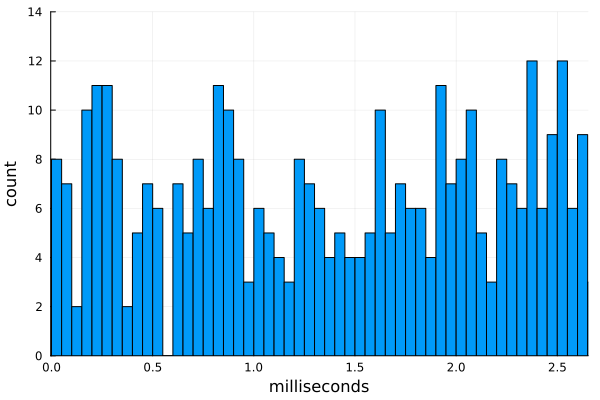

In [12]:
gr()
t2 = optimized_bench.times / 1e6 # times in milliseconds
m, o = minimum(t2), std(t2)

histogram(t2, bins=500,
    xlim=(m - 0.01, m + o),
    xlabel="milliseconds", ylabel="count", label="")

In [13]:
binary_bench = @benchmark binary_search($sorted_vector, generate_random_key())

BenchmarkTools.Trial: 10000 samples with 217 evaluations.
 Range (min … max):  331.336 ns … 875.433 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     361.539 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   370.559 ns ±  41.906 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▁▃▆▇██▇▅▄▃▂▂▁▁▁▁                                            ▂
  ▂▅███████████████████▇▇▄▆▅▅▅▆▆▄▆▆▆▅▄▄▅▅▅▅▅▅▆▅▃▅▆▄▅▄▅▆▄▅▃▃▅▅▆▅ █
  331 ns        Histogram: log(frequency) by time        592 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [14]:
best_times["binary"] = minimum(binary_bench.times) / 1e6

0.0003313364055299539

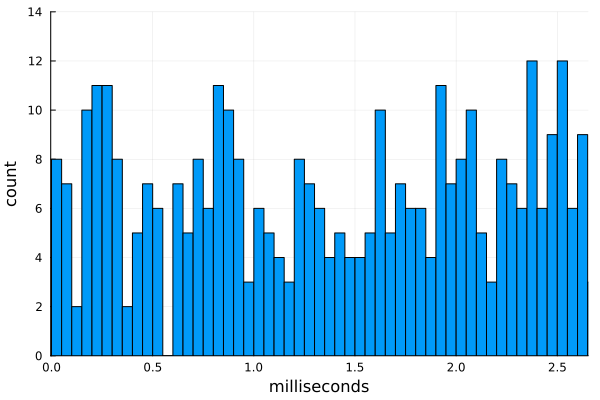

In [15]:
gr()
t3 = optimized_bench.times / 1e6 # times in milliseconds
m, o = minimum(t3), std(t3)

histogram(t3, bins=500,
    xlim=(m - 0.01, m + o),
    xlabel="milliseconds", ylabel="count", label="")

In [16]:
for (key, value) in sort(collect(best_times), by=last)
    println(rpad(key, 20, "."), lpad(round(value; digits=5), 6, "."))
end

binary..............0.00033
optimized...........0.00589
sequential..........10.37969
